# Query for icSrc Sources Results in  OGA

 work with Weakly_2023_44
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/12/20
- update : 2023/12/20


In [1]:
! eups list -s | grep LOCAL

analysis_tools        LOCAL:/home/d/dagoret/repos/repos_w_2023_44/analysis_tools 	setup
atmospec              LOCAL:/home/d/dagoret/repos/repos_w_2023_44/atmospec 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/eups 	setup
spectractor           LOCAL:/home/d/dagoret/repos/repos_w_2023_44/Spectractor 	setup


In [2]:
! eups list -s lsst_distrib

   g4213664e8e+d053631def 	current w_2023_44 setup


In [3]:
import lsst.daf.butler as dafButler
#import lsst.summit.utils.butlerUtils as butlerUtils

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch

from astropy.io import fits

import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch


In [6]:
# LSST Display
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [7]:
transform = AsinhStretch() + PercentileInterval(99.)

In [8]:
#repo =  "/sdf/group/rubin/repo/main"
repo = "/sdf/group/rubin/repo/oga/"
butler = dafButler.Butler(repo)
registry = butler.registry

## Give the collection

In [9]:
my_collection = "LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553"

## Config

- icSrc_schema
- icExp  
- icExpBackground  
- icSrc

In [10]:
datasetRefs = registry.queryDatasets(datasetType='icSrc_schema', collections=my_collection, where= "instrument='LATISS'")
#icSrc_schema = butler.get('icSrc_schema')

## icExp

In [11]:
datasetRefs = registry.queryDatasets(datasetType='icExp', collections=my_collection, where= "instrument='LATISS'")

In [12]:
all_ref_for_icSrc = []
all_dataId = []
all_icExp  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExp ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExp = butler.get('icExp', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExp.append(icExp)
    if i > 5:
        break

========================datasetType = icExp ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300524}
visit...................: 2023080300524
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230803, 'seq_num': 524, 'detector': 0}
========================datasetType = icExp ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400692}
visit...................: 2023052400692
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230524, '

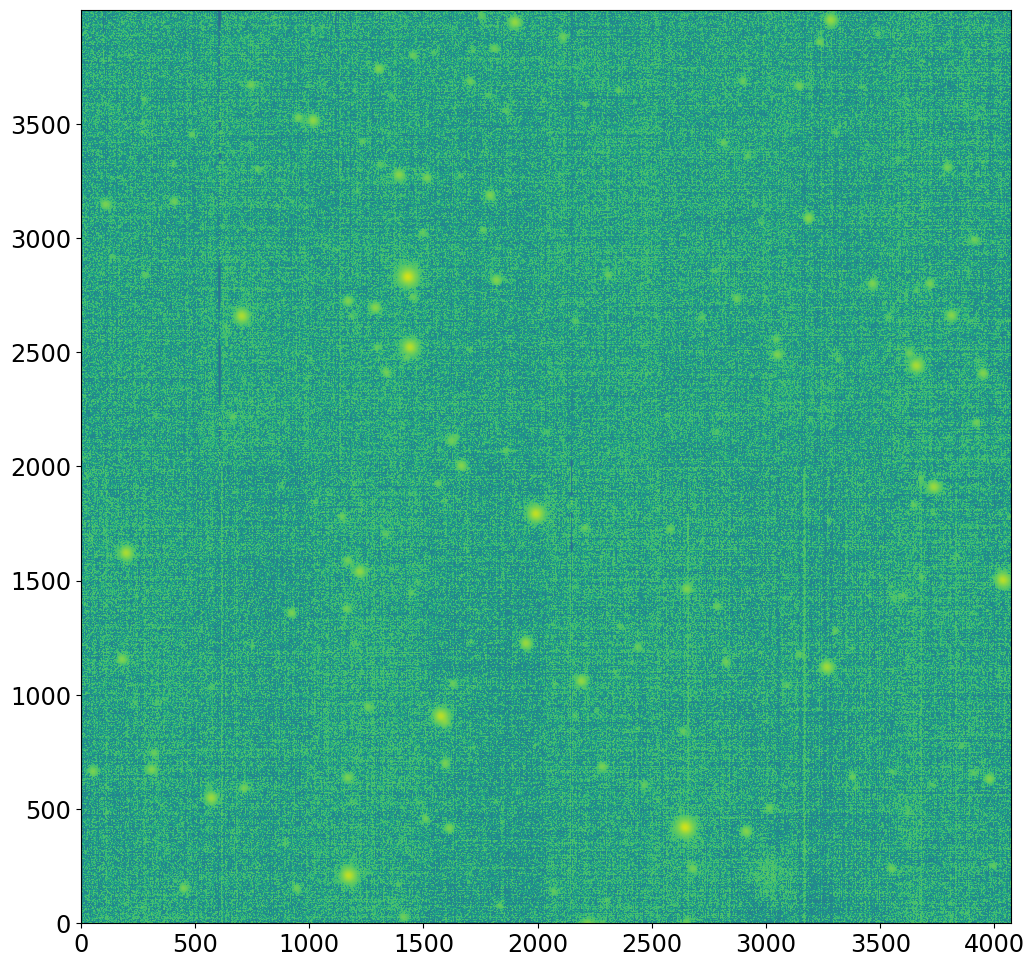

In [13]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(1,1,1)
#linthresh, linscale=1.0, vmin=None, vmax=None, clip=False, *, base=10
ax.imshow(icExp.getImage().array,origin="lower",norm=SymLogNorm(linthresh=1))

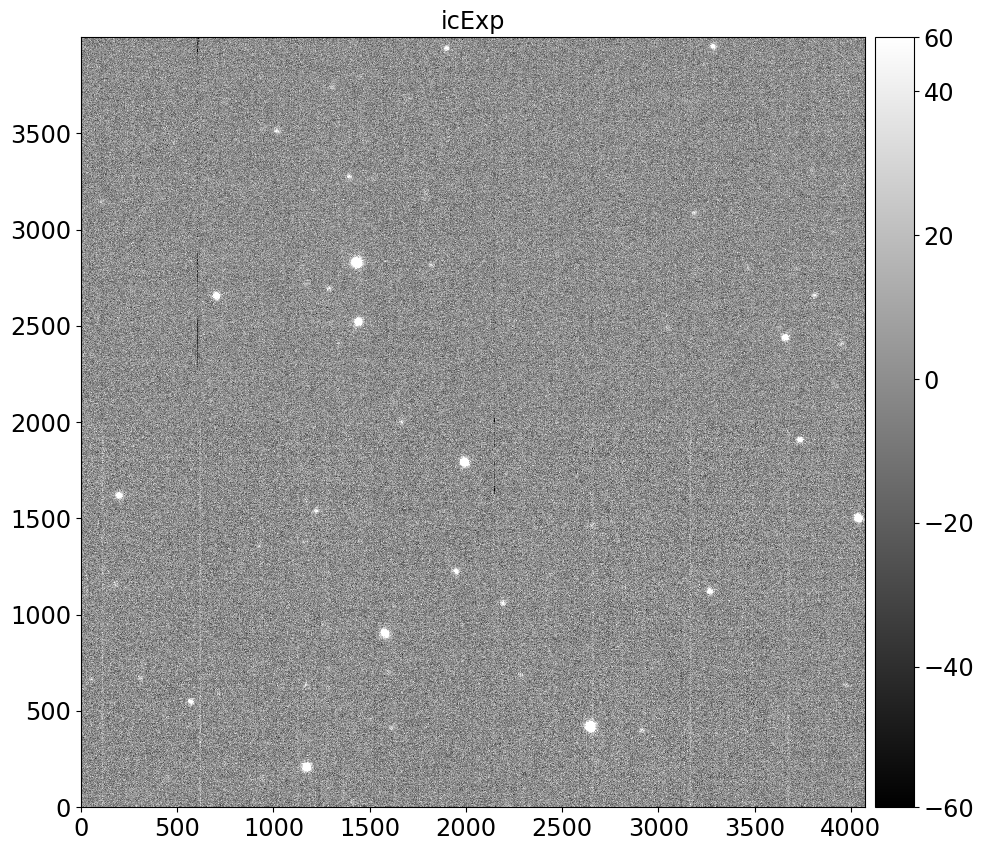

In [14]:
fig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
the_title = f"icExp"
afw_display.mtv(icExp.getImage(),title=the_title)

## icExpBackground

In [15]:
datasetRefs = registry.queryDatasets(datasetType='icExpBackground', collections=my_collection, where= "instrument='LATISS'")

In [16]:
all_ref_for_icExpBg  = []
all_dataId = []
all_icExpBg  = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icExpBackground ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icExpBg = butler.get('icExpBackground', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icExpBg.append(icExpBg) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icExpBg.append(icExpBg)
    if i > 5:
        break

========================datasetType = icExpBackground ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400510}
visit...................: 2023070400510
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230704, 'seq_num': 510, 'detector': 0}
========================datasetType = icExpBackground ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000338}
visit...................: 2023072000338
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'d

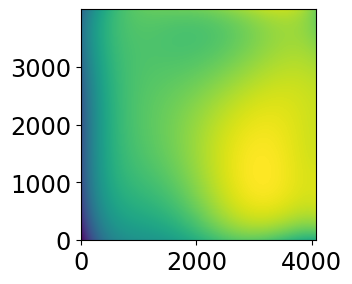

In [17]:
plt.imshow(icExpBg.getImage().array,origin="lower")

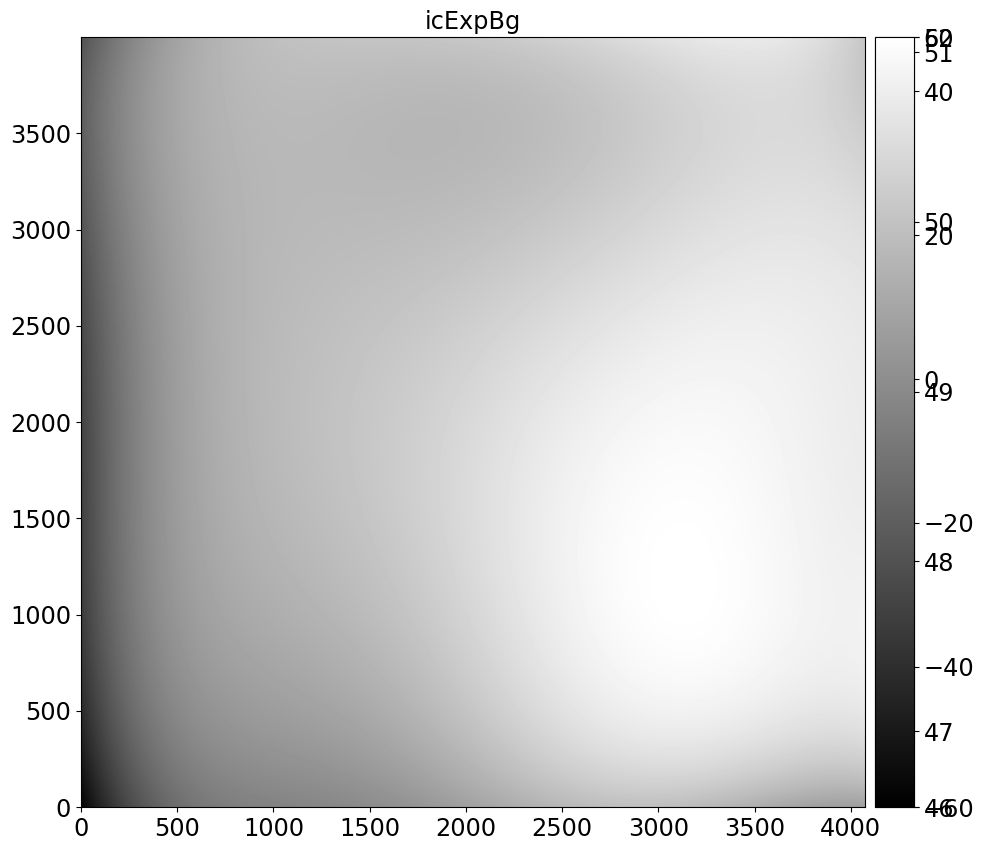

In [18]:
ig = plt.figure(figsize=(12,10))
afw_display = afwDisplay.Display(frame=fig)
afw_display.scale('linear', 'zscale',None)
the_title = f"icExpBg"
afw_display.mtv(icExpBg.getImage(),title=the_title)

## icSrc

In [19]:
datasetRefs = registry.queryDatasets(datasetType='icSrc', collections=my_collection, where= "instrument='LATISS'")

In [20]:
datasetRefs.any() 

True

In [21]:
all_ref_for_icSrc = []
all_dataId = []
all_icSrc = []
all_exposures = []



for i, ref in enumerate(datasetRefs):
    all_ref_for_icSrc.append(ref.dataId)
    print("========================datasetType = icSrc ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    icSrc = butler.get('icSrc', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_icSrc.append(icSrc) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_icSrc.append(icSrc)
    if i > 5:
        break

========================datasetType = icSrc ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400492}
visit...................: 2023070400492
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230704, 'seq_num': 492, 'detector': 0}
========================datasetType = icSrc ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300462}
visit...................: 2023080300462
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230803, '

In [22]:
table_sources = icSrc.asAstropy()
table_sources

<Table length=27>
        id         coord_ra ... base_FootprintArea_value
                     rad    ...           pix           
      int64        float64  ...          int32          
------------------ -------- ... ------------------------
177963157468217345      nan ...                    20453
177963157468217346      nan ...                    15511
177963157468217347      nan ...                     4820
177963157468217348      nan ...                     3726
177963157468217349      nan ...                   127962
177963157468217350      nan ...                     9444
177963157468217351      nan ...                     3236
177963157468217352      nan ...                     4979
177963157468217353      nan ...                     3384
               ...      ... ...                      ...
177963157468217362      nan ...                    32129
177963157468217363      nan ...                     4183
177963157468217364      nan ...                     3581
177963157468217365      nan ...                     3468
177963157468217366      nan ...                     5104
177963157468217367      nan ...                     3396
177963157468217368      nan ...                     4813
177963157468217369      nan ...                    10125
177963157468217370      nan ...                    17011
177963157468217371      nan ...                     5616

## src

In [23]:
datasetRefs = butler.registry.queryDatasets(datasetType='src', collections=my_collection, where= "instrument='LATISS'")

In [24]:
all_ref_for_src = []
all_dataId = []
all_src = []
all_exposures = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = src ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    src = butler.get('src', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_src.append(src)
    if i > 5:
        break

========================datasetType = src ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400657}
visit...................: 2023052400657
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230524, 'seq_num': 657, 'detector': 0}
========================datasetType = src ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400580}
visit...................: 2023070400580
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230704, 'seq_

In [25]:
datasetRefs.any()

True

# Sources

In [26]:
datasetRefs = butler.registry.queryDatasets(datasetType='sourceTable', collections=my_collection, where= "instrument='LATISS'")

In [27]:
all_ref_for_src = []
all_dataId = []
all_src = []
all_exposures = []
all_sourcesTables = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = sourceTable ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_visit = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0,}
    print(the_dataId)
    tab       = butler.get(ref,collections=my_collection)
    all_sourcesTables.append(tab) 
    #src = butler.get('source', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    #all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    
    #if i > 5:
    #    break

========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700503}
visit...................: 2023081700503
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 503, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400065}
visit...................: 2023091400065
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300656}
visit...................: 2023080300656
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 656, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600366}
visit...................: 2023070600366
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900450}
visit...................: 2023082900450
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 450, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300618}
visit...................: 2023080300618
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000207}
visit...................: 2023072000207
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 207, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500425}
visit...................: 2023070500425
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700546}
visit...................: 2023081700546
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 546, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100430}
visit...................: 2023051100430
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900485}
visit...................: 2023082900485
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 485, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080100275}
visit...................: 2023080100275
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800104}
visit...................: 2023092800104
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 104, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700453}
visit...................: 2023081700453
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700551}
visit...................: 2023081700551
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 551, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300346}
visit...................: 2023080300346
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081500112}
visit...................: 2023081500112
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230815, 'seq_num': 112, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000251}
visit...................: 2023101000251
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400671}
visit...................: 2023052400671
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 671, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800106}
visit...................: 2023092800106
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070400462}
visit...................: 2023070400462
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 462, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300450}
visit...................: 2023080300450
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300525}
visit...................: 2023080300525
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 525, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700539}
visit...................: 2023081700539
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000185}
visit...................: 2023072000185
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 185, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000209}
visit...................: 2023072000209
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100486}
visit...................: 2023051100486
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 486, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400688}
visit...................: 2023052400688
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300422}
visit...................: 2023080300422
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 422, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700483}
visit...................: 2023081700483
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000279}
visit...................: 2023101000279
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 279, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300589}
visit...................: 2023080300589
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900442}
visit...................: 2023082900442
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 442, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300541}
visit...................: 2023080300541
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052300646}
visit...................: 2023052300646
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230523, 'seq_num': 646, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300732}
visit...................: 2023080300732
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300511}
visit...................: 2023080300511
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 511, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300330}
visit...................: 2023080300330
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800252}
visit...................: 2023071800252
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 252, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800326}
visit...................: 2023110800326
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000285}
visit...................: 2023101000285
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 285, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500339}
visit...................: 2023070500339
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000299}
visit...................: 2023101000299
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 299, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110800331}
visit...................: 2023110800331
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100477}
visit...................: 2023051100477
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 477, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300409}
visit...................: 2023080300409
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600346}
visit...................: 2023070600346
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 346, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900487}
visit...................: 2023082900487
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100319}
visit...................: 2023051100319
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 319, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500410}
visit...................: 2023070500410
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300599}
visit...................: 2023080300599
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 599, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080100311}
visit...................: 2023080100311
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300557}
visit...................: 2023080300557
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 557, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100353}
visit...................: 2023051100353
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600509}
visit...................: 2023070600509
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 509, 'detector': 0}


/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100452}
visit...................: 2023051100452
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 452, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400542}
visit...................: 2023070400542
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300621}
visit...................: 2023080300621
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 621, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300296}
visit...................: 2023080300296
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900370}
visit...................: 2023082900370
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 370, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300436}
visit...................: 2023080300436
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300382}
visit...................: 2023080300382
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 382, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800261}
visit...................: 2023071800261
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600428}
visit...................: 2023070600428
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 428, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200666}
visit...................: 2023080200666
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000292}
visit...................: 2023101000292
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 292, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080100239}
visit...................: 2023080100239
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900488}
visit...................: 2023082900488
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 488, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900431}
visit...................: 2023082900431
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900396}
visit...................: 2023082900396
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 396, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300429}
visit...................: 2023080300429
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300378}
visit...................: 2023080300378
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 378, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100325}
visit...................: 2023051100325
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600370}
visit...................: 2023070600370
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 370, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000214}
visit...................: 2023072000214
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700484}
visit...................: 2023081700484
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 484, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000186}
visit...................: 2023072000186
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400697}
visit...................: 2023052400697
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 697, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100490}
visit...................: 2023051100490
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300639}
visit...................: 2023080300639
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 639, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110700592}
visit...................: 2023110700592
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300600}
visit...................: 2023080300600
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 600, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300738}
visit...................: 2023080300738
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700509}
visit...................: 2023081700509
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 509, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300322}
visit...................: 2023080300322
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000210}
visit...................: 2023072000210
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 210, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800117}
visit...................: 2023092800117
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100455}
visit...................: 2023051100455
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 455, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900435}
visit...................: 2023082900435
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500381}
visit...................: 2023070500381
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 381, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400080}
visit...................: 2023091400080
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080100297}
visit...................: 2023080100297
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 297, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052300635}
visit...................: 2023052300635
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900413}
visit...................: 2023082900413
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 413, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300662}
visit...................: 2023080300662
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400698}
visit...................: 2023052400698
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 698, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600331}
visit...................: 2023070600331
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800251}
visit...................: 2023071800251
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 251, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600578}
visit...................: 2023070600578
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100429}
visit...................: 2023051100429
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 429, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052300610}
visit...................: 2023052300610
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400695}
visit...................: 2023052400695
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 695, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000409}
visit...................: 2023072000409
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700479}
visit...................: 2023081700479
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 479, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500389}
visit...................: 2023070500389
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900414}
visit...................: 2023082900414
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 414, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400079}
visit...................: 2023091400079
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400654}
visit...................: 2023052400654
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 654, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100294}
visit...................: 2023051100294
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700472}
visit...................: 2023081700472
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 472, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100492}
visit...................: 2023051100492
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400590}
visit...................: 2023070400590
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 590, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100343}
visit...................: 2023051100343
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100315}
visit...................: 2023051100315
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 315, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800088}
visit...................: 2023092800088
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300437}
visit...................: 2023080300437
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 437, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900429}
visit...................: 2023082900429
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800259}
visit...................: 2023071800259
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 259, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300523}
visit...................: 2023080300523
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200645}
visit...................: 2023080200645
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 645, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110700579}
visit...................: 2023110700579
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000272}
visit...................: 2023101000272
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 272, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600472}
visit...................: 2023070600472
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300468}
visit...................: 2023080300468
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 468, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000158}
visit...................: 2023072000158
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900457}
visit...................: 2023082900457
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 457, 'detector': 0}


/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600323}
visit...................: 2023070600323
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 323, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900349}
visit...................: 2023082900349
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700493}
visit...................: 2023081700493
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 493, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500429}
visit...................: 2023070500429
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052300629}
visit...................: 2023052300629
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230523, 'seq_num': 629, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600474}
visit...................: 2023070600474
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800272}
visit...................: 2023071800272
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 272, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900474}
visit...................: 2023082900474
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300609}
visit...................: 2023080300609
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 609, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100466}
visit...................: 2023051100466
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300368}
visit...................: 2023080300368
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 368, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100480}
visit...................: 2023051100480
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300470}
visit...................: 2023080300470
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 470, 'detector': 0}


/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800335}
visit...................: 2023110800335
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 335, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000222}
visit...................: 2023072000222
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110800359}
visit...................: 2023110800359
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 359, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400685}
visit...................: 2023052400685
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900395}
visit...................: 2023082900395
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 395, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300460}
visit...................: 2023080300460
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900464}
visit...................: 2023082900464
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 464, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800119}
visit...................: 2023092800119
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900358}
visit...................: 2023082900358
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 358, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800243}
visit...................: 2023071800243
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000202}
visit...................: 2023072000202
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 202, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052300640}
visit...................: 2023052300640
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800126}
visit...................: 2023092800126
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 126, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400675}
visit...................: 2023052400675
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700558}
visit...................: 2023081700558
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 558, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300504}
visit...................: 2023080300504
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100435}
visit...................: 2023051100435
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 435, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900449}
visit...................: 2023082900449
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000193}
visit...................: 2023072000193
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 193, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200625}
visit...................: 2023080200625
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600447}
visit...................: 2023070600447
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 447, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900374}
visit...................: 2023082900374
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100332}
visit...................: 2023051100332
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 332, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800277}
visit...................: 2023071800277
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080100307}
visit...................: 2023080100307
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 307, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200676}
visit...................: 2023080200676
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900411}
visit...................: 2023082900411
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 411, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300562}
visit...................: 2023080300562
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300692}
visit...................: 2023080300692
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 692, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100357}
visit...................: 2023051100357
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400679}
visit...................: 2023052400679
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 679, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600462}
visit...................: 2023070600462
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300730}
visit...................: 2023080300730
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 730, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600481}
visit...................: 2023070600481
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800134}
visit...................: 2023092800134
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 134, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110800283}
visit...................: 2023110800283
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400064}
visit...................: 2023091400064
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230914, 'seq_num': 64, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600563}
visit...................: 2023070600563
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800358}
visit...................: 2023110800358
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 358, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500416}
visit...................: 2023070500416
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100347}
visit...................: 2023051100347
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 347, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600517}
visit...................: 2023070600517
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900373}
visit...................: 2023082900373
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 373, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101100288}
visit...................: 2023101100288
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900379}
visit...................: 2023082900379
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 379, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700476}
visit...................: 2023081700476
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300659}
visit...................: 2023080300659
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 659, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600445}
visit...................: 2023070600445
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800109}
visit...................: 2023092800109
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 109, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070400540}
visit...................: 2023070400540
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500415}
visit...................: 2023070500415
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 415, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600570}
visit...................: 2023070600570
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500349}
visit...................: 2023070500349
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 349, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200614}
visit...................: 2023080200614
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800239}
visit...................: 2023071800239
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 239, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800091}
visit...................: 2023092800091
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300690}
visit...................: 2023080300690
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 690, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900458}
visit...................: 2023082900458
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100299}
visit...................: 2023051100299
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 299, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500354}
visit...................: 2023070500354
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900361}
visit...................: 2023082900361
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 361, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600444}
visit...................: 2023070600444
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081600322}
visit...................: 2023081600322
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230816, 'seq_num': 322, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100465}
visit...................: 2023051100465
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300731}
visit...................: 2023080300731
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 731, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600405}
visit...................: 2023070600405
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400068}
visit...................: 2023091400068
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230914, 'seq_num': 68, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100329}
visit...................: 2023051100329
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800329}
visit...................: 2023110800329
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 329, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700507}
visit...................: 2023081700507
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400511}
visit...................: 2023070400511
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 511, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600512}
visit...................: 2023070600512
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100439}
visit...................: 2023051100439
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 439, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100489}
visit...................: 2023051100489
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700500}
visit...................: 2023081700500
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 500, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100316}
visit...................: 2023051100316
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900407}
visit...................: 2023082900407
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 407, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800290}
visit...................: 2023071800290
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000341}
visit...................: 2023101000341
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 341, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000249}
visit...................: 2023101000249
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300577}
visit...................: 2023080300577
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 577, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300543}
visit...................: 2023080300543
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000250}
visit...................: 2023101000250
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 250, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052300609}
visit...................: 2023052300609
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400069}
visit...................: 2023091400069
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230914, 'seq_num': 69, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400668}
visit...................: 2023052400668
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100276}
visit...................: 2023051100276
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 276, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800233}
visit...................: 2023071800233
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500343}
visit...................: 2023070500343
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 343, 'detector': 0}


/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600409}
visit...................: 2023070600409
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 409, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110700325}
visit...................: 2023110700325
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110800322}
visit...................: 2023110800322
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 322, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300363}
visit...................: 2023080300363
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000280}
visit...................: 2023101000280
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 280, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092700276}
visit...................: 2023092700276
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300432}
visit...................: 2023080300432
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 432, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110800327}
visit...................: 2023110800327
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700549}
visit...................: 2023081700549
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 549, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700537}
visit...................: 2023081700537
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000270}
visit...................: 2023101000270
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 270, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100302}
visit...................: 2023051100302
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300608}
visit...................: 2023080300608
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 608, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600317}
visit...................: 2023070600317
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100359}
visit...................: 2023051100359
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 359, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200639}
visit...................: 2023080200639
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800299}
visit...................: 2023071800299
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 299, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300486}
visit...................: 2023080300486
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600458}
visit...................: 2023070600458
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 458, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900378}
visit...................: 2023082900378
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600500}
visit...................: 2023070600500
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 500, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600497}
visit...................: 2023070600497
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400656}
visit...................: 2023052400656
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 656, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300498}
visit...................: 2023080300498
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700506}
visit...................: 2023081700506
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 506, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000216}
visit...................: 2023072000216
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100491}
visit...................: 2023051100491
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 491, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800226}
visit...................: 2023071800226
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800276}
visit...................: 2023071800276
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 276, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400670}
visit...................: 2023052400670
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600318}
visit...................: 2023070600318
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 318, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080100305}
visit...................: 2023080100305
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200669}
visit...................: 2023080200669
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 669, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600320}
visit...................: 2023070600320
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400696}
visit...................: 2023052400696
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 696, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100449}
visit...................: 2023051100449
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400677}
visit...................: 2023052400677
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 677, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300343}
visit...................: 2023080300343
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110700581}
visit...................: 2023110700581
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231107, 'seq_num': 581, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900401}
visit...................: 2023082900401
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900426}
visit...................: 2023082900426
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 426, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300490}
visit...................: 2023080300490
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300510}
visit...................: 2023080300510
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 510, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300462}
visit...................: 2023080300462
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900365}
visit...................: 2023082900365
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 365, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000296}
visit...................: 2023101000296
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080100312}
visit...................: 2023080100312
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 312, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200673}
visit...................: 2023080200673
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300478}
visit...................: 2023080300478
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 478, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300289}
visit...................: 2023080300289
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700481}
visit...................: 2023081700481
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 481, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000212}
visit...................: 2023072000212
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000245}
visit...................: 2023101000245
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 245, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100460}
visit...................: 2023051100460
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900424}
visit...................: 2023082900424
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 424, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300512}
visit...................: 2023080300512
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500436}
visit...................: 2023070500436
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 436, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300499}
visit...................: 2023080300499
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800105}
visit...................: 2023092800105
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 105, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000379}
visit...................: 2023072000379
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000240}
visit...................: 2023101000240
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 240, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000213}
visit...................: 2023072000213
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300350}
visit...................: 2023080300350
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 350, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400680}
visit...................: 2023052400680
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800265}
visit...................: 2023071800265
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 265, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110800318}
visit...................: 2023110800318
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400453}
visit...................: 2023070400453
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 453, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100323}
visit...................: 2023051100323
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300484}
visit...................: 2023080300484
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 484, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000188}
visit...................: 2023072000188
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900472}
visit...................: 2023082900472
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 472, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000162}
visit...................: 2023072000162
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300727}
visit...................: 2023080300727
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 727, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300465}
visit...................: 2023080300465
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100274}
visit...................: 2023051100274
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 274, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700553}
visit...................: 2023081700553
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600440}
visit...................: 2023070600440
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 440, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300509}
visit...................: 2023080300509
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000241}
visit...................: 2023101000241
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 241, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100301}
visit...................: 2023051100301
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600452}
visit...................: 2023070600452
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 452, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300714}
visit...................: 2023080300714
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500357}
visit...................: 2023070500357
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 357, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110800339}
visit...................: 2023110800339
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100342}
visit...................: 2023051100342
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 342, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400059}
visit...................: 2023091400059
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300603}
visit...................: 2023080300603
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 603, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000290}
visit...................: 2023101000290
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500428}
visit...................: 2023070500428
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 428, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000343}
visit...................: 2023072000343
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300449}
visit...................: 2023080300449
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 449, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070400452}
visit...................: 2023070400452
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300594}
visit...................: 2023080300594
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 594, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100448}
visit...................: 2023051100448
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300613}
visit...................: 2023080300613
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 613, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400510}
visit...................: 2023070400510
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900348}
visit...................: 2023082900348
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 348, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400075}
visit...................: 2023091400075
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600443}
visit...................: 2023070600443
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 443, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300428}
visit...................: 2023080300428
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600485}
visit...................: 2023070600485
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 485, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600332}
visit...................: 2023070600332
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052300642}
visit...................: 2023052300642
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230523, 'seq_num': 642, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052300634}
visit...................: 2023052300634
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081600320}
visit...................: 2023081600320
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230816, 'seq_num': 320, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600336}
visit...................: 2023070600336
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800273}
visit...................: 2023071800273
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 273, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900363}
visit...................: 2023082900363
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300551}
visit...................: 2023080300551
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 551, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600338}
visit...................: 2023070600338
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800244}
visit...................: 2023071800244
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 244, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300685}
visit...................: 2023080300685
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400076}
visit...................: 2023091400076
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230914, 'seq_num': 76, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600484}
visit...................: 2023070600484
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052300622}
visit...................: 2023052300622
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230523, 'seq_num': 622, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300592}
visit...................: 2023080300592
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300622}
visit...................: 2023080300622
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 622, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110800336}
visit...................: 2023110800336
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500350}
visit...................: 2023070500350
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 350, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101100291}
visit...................: 2023101100291
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600465}
visit...................: 2023070600465
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 465, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100345}
visit...................: 2023051100345
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080100300}
visit...................: 2023080100300
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 300, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081600312}
visit...................: 2023081600312
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700467}
visit...................: 2023081700467
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 467, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800147}
visit...................: 2023092800147
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800283}
visit...................: 2023071800283
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 283, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800241}
visit...................: 2023071800241
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080100242}
visit...................: 2023080100242
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 242, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600483}
visit...................: 2023070600483
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900489}
visit...................: 2023082900489
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 489, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400672}
visit...................: 2023052400672
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100327}
visit...................: 2023051100327
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 327, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400574}
visit...................: 2023070400574
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300439}
visit...................: 2023080300439
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 439, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900367}
visit...................: 2023082900367
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500419}
visit...................: 2023070500419
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 419, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000276}
visit...................: 2023101000276
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700505}
visit...................: 2023081700505
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 505, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100271}
visit...................: 2023051100271
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800125}
visit...................: 2023092800125
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 125, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000174}
visit...................: 2023072000174
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100447}
visit...................: 2023051100447
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 447, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100360}
visit...................: 2023051100360
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100479}
visit...................: 2023051100479
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 479, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600356}
visit...................: 2023070600356
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300544}
visit...................: 2023080300544
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 544, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300297}
visit...................: 2023080300297
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400660}
visit...................: 2023052400660
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 660, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300722}
visit...................: 2023080300722
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000297}
visit...................: 2023101000297
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 297, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900403}
visit...................: 2023082900403
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600350}
visit...................: 2023070600350
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 350, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000289}
visit...................: 2023101000289
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800081}
visit...................: 2023092800081
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 81, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300676}
visit...................: 2023080300676
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110700583}
visit...................: 2023110700583
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231107, 'seq_num': 583, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600321}
visit...................: 2023070600321
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900377}
visit...................: 2023082900377
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 377, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600470}
visit...................: 2023070600470
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500431}
visit...................: 2023070500431
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 431, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400664}
visit...................: 2023052400664
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500351}
visit...................: 2023070500351
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 351, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300689}
visit...................: 2023080300689
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110700573}
visit...................: 2023110700573
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231107, 'seq_num': 573, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600579}
visit...................: 2023070600579
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400070}
visit...................: 2023091400070
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230914, 'seq_num': 70, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100350}
visit...................: 2023051100350
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110800334}
visit...................: 2023110800334
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 334, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600396}
visit...................: 2023070600396
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600519}
visit...................: 2023070600519
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 519, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300650}
visit...................: 2023080300650
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600508}
visit...................: 2023070600508
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 508, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100277}
visit...................: 2023051100277
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700471}
visit...................: 2023081700471
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 471, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052300611}
visit...................: 2023052300611
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092700272}
visit...................: 2023092700272
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230927, 'seq_num': 272, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300373}
visit...................: 2023080300373
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110700337}
visit...................: 2023110700337
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231107, 'seq_num': 337, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600424}
visit...................: 2023070600424
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600393}
visit...................: 2023070600393
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 393, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900355}
visit...................: 2023082900355
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600347}
visit...................: 2023070600347
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 347, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700536}
visit...................: 2023081700536
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700513}
visit...................: 2023081700513
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 513, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300667}
visit...................: 2023080300667
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081500114}
visit...................: 2023081500114
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230815, 'seq_num': 114, 'detector': 0}


/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600326}
visit...................: 2023070600326
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 326, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900441}
visit...................: 2023082900441
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100310}
visit...................: 2023051100310
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 310, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600469}
visit...................: 2023070600469
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600522}
visit...................: 2023070600522
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 522, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900416}
visit...................: 2023082900416
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100311}
visit...................: 2023051100311
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 311, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100290}
visit...................: 2023051100290
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000284}
visit...................: 2023101000284
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 284, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300657}
visit...................: 2023080300657
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600491}
visit...................: 2023070600491
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 491, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500420}
visit...................: 2023070500420
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300517}
visit...................: 2023080300517
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 517, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900454}
visit...................: 2023082900454
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081600317}
visit...................: 2023081600317
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230816, 'seq_num': 317, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900376}
visit...................: 2023082900376
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900434}
visit...................: 2023082900434
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 434, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300620}
visit...................: 2023080300620
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400072}
visit...................: 2023091400072
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230914, 'seq_num': 72, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300370}
visit...................: 2023080300370
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000200}
visit...................: 2023072000200
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 200, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200649}
visit...................: 2023080200649
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080100310}
visit...................: 2023080100310
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 310, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500400}
visit...................: 2023070500400
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500362}
visit...................: 2023070500362
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 362, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800297}
visit...................: 2023071800297
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300282}
visit...................: 2023080300282
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 282, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500442}
visit...................: 2023070500442
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200634}
visit...................: 2023080200634
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 634, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300408}
visit...................: 2023080300408
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300349}
visit...................: 2023080300349
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 349, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110700578}
visit...................: 2023110700578
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081600314}
visit...................: 2023081600314
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230816, 'seq_num': 314, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600453}
visit...................: 2023070600453
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600544}
visit...................: 2023070600544
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 544, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300651}
visit...................: 2023080300651
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600394}
visit...................: 2023070600394
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 394, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800136}
visit...................: 2023092800136
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900465}
visit...................: 2023082900465
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 465, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400704}
visit...................: 2023052400704
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300352}
visit...................: 2023080300352
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 352, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052300615}
visit...................: 2023052300615
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800291}
visit...................: 2023071800291
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 291, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900360}
visit...................: 2023082900360
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500341}
visit...................: 2023070500341
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 341, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600359}
visit...................: 2023070600359
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600374}
visit...................: 2023070600374
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 374, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800318}
visit...................: 2023071800318
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300447}
visit...................: 2023080300447
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 447, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300597}
visit...................: 2023080300597
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400489}
visit...................: 2023070400489
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 489, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600454}
visit...................: 2023070600454
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500386}
visit...................: 2023070500386
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 386, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800100}
visit...................: 2023092800100
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400541}
visit...................: 2023070400541
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 541, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900478}
visit...................: 2023082900478
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200636}
visit...................: 2023080200636
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 636, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080100241}
visit...................: 2023080100241
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081600316}
visit...................: 2023081600316
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230816, 'seq_num': 316, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600504}
visit...................: 2023070600504
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000189}
visit...................: 2023072000189
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 189, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080100226}
visit...................: 2023080100226
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700466}
visit...................: 2023081700466
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 466, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300623}
visit...................: 2023080300623
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600457}
visit...................: 2023070600457
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 457, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100487}
visit...................: 2023051100487
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000300}
visit...................: 2023101000300
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 300, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500356}
visit...................: 2023070500356
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300720}
visit...................: 2023080300720
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 720, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081600321}
visit...................: 2023081600321
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700555}
visit...................: 2023081700555
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 555, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100280}
visit...................: 2023051100280
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900423}
visit...................: 2023082900423
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 423, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070400485}
visit...................: 2023070400485
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000217}
visit...................: 2023072000217
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 217, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800279}
visit...................: 2023071800279
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900427}
visit...................: 2023082900427
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 427, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000219}
visit...................: 2023072000219
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300298}
visit...................: 2023080300298
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 298, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000293}
visit...................: 2023101000293
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300332}
visit...................: 2023080300332
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 332, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110800304}
visit...................: 2023110800304
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300563}
visit...................: 2023080300563
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 563, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300716}
visit...................: 2023080300716
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900345}
visit...................: 2023082900345
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 345, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300459}
visit...................: 2023080300459
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700547}
visit...................: 2023081700547
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 547, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000252}
visit...................: 2023101000252
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200642}
visit...................: 2023080200642
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 642, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200640}
visit...................: 2023080200640
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300645}
visit...................: 2023080300645
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 645, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200662}
visit...................: 2023080200662
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600343}
visit...................: 2023070600343
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 343, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110800337}
visit...................: 2023110800337
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800308}
visit...................: 2023110800308
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 308, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000244}
visit...................: 2023101000244
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300583}
visit...................: 2023080300583
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 583, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600349}
visit...................: 2023070600349
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500409}
visit...................: 2023070500409
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 409, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400693}
visit...................: 2023052400693
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900475}
visit...................: 2023082900475
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 475, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300427}
visit...................: 2023080300427
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300475}
visit...................: 2023080300475
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 475, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600377}
visit...................: 2023070600377
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700516}
visit...................: 2023081700516
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 516, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100442}
visit...................: 2023051100442
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100270}
visit...................: 2023051100270
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 270, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600410}
visit...................: 2023070600410
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500397}
visit...................: 2023070500397
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 397, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200624}
visit...................: 2023080200624
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080100228}
visit...................: 2023080100228
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 228, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000274}
visit...................: 2023101000274
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900491}
visit...................: 2023082900491
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 491, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200627}
visit...................: 2023080200627
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400681}
visit...................: 2023052400681
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 681, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400593}
visit...................: 2023070400593
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700496}
visit...................: 2023081700496
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 496, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800341}
visit...................: 2023110800341
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900498}
visit...................: 2023082900498
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 498, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800089}
visit...................: 2023092800089
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300491}
visit...................: 2023080300491
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 491, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300653}
visit...................: 2023080300653
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400658}
visit...................: 2023052400658
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 658, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800135}
visit...................: 2023092800135
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000286}
visit...................: 2023101000286
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 286, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300386}
visit...................: 2023080300386
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900486}
visit...................: 2023082900486
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 486, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100313}
visit...................: 2023051100313
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900420}
visit...................: 2023082900420
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 420, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100285}
visit...................: 2023051100285
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400673}
visit...................: 2023052400673
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 673, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000172}
visit...................: 2023072000172
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110800362}
visit...................: 2023110800362
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 362, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052300647}
visit...................: 2023052300647
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080100296}
visit...................: 2023080100296
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 296, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300530}
visit...................: 2023080300530
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052300612}
visit...................: 2023052300612
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230523, 'seq_num': 612, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700494}
visit...................: 2023081700494
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400661}
visit...................: 2023052400661
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 661, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700474}
visit...................: 2023081700474
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600468}
visit...................: 2023070600468
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 468, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300290}
visit...................: 2023080300290
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000374}
visit...................: 2023072000374
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 374, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300724}
visit...................: 2023080300724
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110700594}
visit...................: 2023110700594
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231107, 'seq_num': 594, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100273}
visit...................: 2023051100273
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900444}
visit...................: 2023082900444
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 444, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052300621}
visit...................: 2023052300621
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070400598}
visit...................: 2023070400598
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 598, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300279}
visit...................: 2023080300279
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900503}
visit...................: 2023082900503
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 503, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700520}
visit...................: 2023081700520
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500433}
visit...................: 2023070500433
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 433, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600520}
visit...................: 2023070600520
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800312}
visit...................: 2023071800312
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 312, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300338}
visit...................: 2023080300338
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080100222}
visit...................: 2023080100222
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 222, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000247}
visit...................: 2023101000247
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052300628}
visit...................: 2023052300628
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230523, 'seq_num': 628, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300737}
visit...................: 2023080300737
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400706}
visit...................: 2023052400706
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 706, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500444}
visit...................: 2023070500444
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300642}
visit...................: 2023080300642
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 642, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700548}
visit...................: 2023081700548
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000265}
visit...................: 2023101000265
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 265, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900461}
visit...................: 2023082900461
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081500110}
visit...................: 2023081500110
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230815, 'seq_num': 110, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500382}
visit...................: 2023070500382
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300494}
visit...................: 2023080300494
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 494, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400488}
visit...................: 2023070400488
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100287}
visit...................: 2023051100287
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 287, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600441}
visit...................: 2023070600441
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000194}
visit...................: 2023072000194
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 194, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100335}
visit...................: 2023051100335
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100306}
visit...................: 2023051100306
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 306, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400655}
visit...................: 2023052400655
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000257}
visit...................: 2023101000257
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 257, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300458}
visit...................: 2023080300458
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800292}
visit...................: 2023071800292
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 292, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400591}
visit...................: 2023070400591
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080100293}
visit...................: 2023080100293
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 293, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100481}
visit...................: 2023051100481
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300419}
visit...................: 2023080300419
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 419, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800262}
visit...................: 2023071800262
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110800368}
visit...................: 2023110800368
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 368, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600488}
visit...................: 2023070600488
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600505}
visit...................: 2023070600505
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 505, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600373}
visit...................: 2023070600373
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800249}
visit...................: 2023071800249
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 249, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800237}
visit...................: 2023071800237
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080100224}
visit...................: 2023080100224
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 224, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200630}
visit...................: 2023080200630
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300728}
visit...................: 2023080300728
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 728, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200612}
visit...................: 2023080200612
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700491}
visit...................: 2023081700491
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 491, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000380}
visit...................: 2023072000380
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900404}
visit...................: 2023082900404
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 404, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100445}
visit...................: 2023051100445
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080100233}
visit...................: 2023080100233
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 233, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900397}
visit...................: 2023082900397
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400707}
visit...................: 2023052400707
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 707, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000167}
visit...................: 2023072000167
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100472}
visit...................: 2023051100472
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 472, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400659}
visit...................: 2023052400659
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300619}
visit...................: 2023080300619
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 619, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900443}
visit...................: 2023082900443
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600467}
visit...................: 2023070600467
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 467, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400683}
visit...................: 2023052400683
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300665}
visit...................: 2023080300665
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 665, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100443}
visit...................: 2023051100443
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300588}
visit...................: 2023080300588
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 588, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300548}
visit...................: 2023080300548
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200635}
visit...................: 2023080200635
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 635, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500348}
visit...................: 2023070500348
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400058}
visit...................: 2023091400058
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230914, 'seq_num': 58, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023052400702}
visit...................: 2023052400702
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400709}
visit...................: 2023052400709
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 709, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081600313}
visit...................: 2023081600313
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600471}
visit...................: 2023070600471
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 471, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800338}
visit...................: 2023110800338
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900448}
visit...................: 2023082900448
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 448, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000295}
visit...................: 2023101000295
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300691}
visit...................: 2023080300691
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 691, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300587}
visit...................: 2023080300587
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800129}
visit...................: 2023092800129
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 129, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300496}
visit...................: 2023080300496
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200629}
visit...................: 2023080200629
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 629, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400700}
visit...................: 2023052400700
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080100243}
visit...................: 2023080100243
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 243, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300616}
visit...................: 2023080300616
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300442}
visit...................: 2023080300442
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 442, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100444}
visit...................: 2023051100444
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300518}
visit...................: 2023080300518
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 518, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300410}
visit...................: 2023080300410
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600361}
visit...................: 2023070600361
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 361, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300547}
visit...................: 2023080300547
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500384}
visit...................: 2023070500384
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 384, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400056}
visit...................: 2023091400056
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300336}
visit...................: 2023080300336
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 336, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100275}
visit...................: 2023051100275
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300687}
visit...................: 2023080300687
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 687, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092700277}
visit...................: 2023092700277
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000258}
visit...................: 2023101000258
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 258, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400594}
visit...................: 2023070400594
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100307}
visit...................: 2023051100307
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 307, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900446}
visit...................: 2023082900446
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400691}
visit...................: 2023052400691
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 691, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300418}
visit...................: 2023080300418
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100320}
visit...................: 2023051100320
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 320, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110700342}
visit...................: 2023110700342
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800311}
visit...................: 2023110800311
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 311, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300607}
visit...................: 2023080300607
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300615}
visit...................: 2023080300615
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 615, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600314}
visit...................: 2023070600314
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300640}
visit...................: 2023080300640
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 640, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700499}
visit...................: 2023081700499
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900438}
visit...................: 2023082900438
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 438, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800121}
visit...................: 2023092800121
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300696}
visit...................: 2023080300696
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 696, 'detector': 0}


/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200616}
visit...................: 2023080200616
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 616, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100476}
visit...................: 2023051100476
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600571}
visit...................: 2023070600571
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 571, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500426}
visit...................: 2023070500426
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000196}
visit...................: 2023072000196
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 196, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100264}
visit...................: 2023051100264
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300719}
visit...................: 2023080300719
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 719, 'detector': 0}


/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300661}
visit...................: 2023080300661
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 661, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900418}
visit...................: 2023082900418
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300423}
visit...................: 2023080300423
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 423, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300376}
visit...................: 2023080300376
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200674}
visit...................: 2023080200674
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 674, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900351}
visit...................: 2023082900351
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300703}
visit...................: 2023080300703
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 703, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500399}
visit...................: 2023070500399
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000233}
visit...................: 2023101000233
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 233, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000224}
visit...................: 2023072000224
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800316}
visit...................: 2023071800316
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 316, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300366}
visit...................: 2023080300366
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600379}
visit...................: 2023070600379
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 379, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200606}
visit...................: 2023080200606
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300736}
visit...................: 2023080300736
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 736, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300407}
visit...................: 2023080300407
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300630}
visit...................: 2023080300630
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 630, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000239}
visit...................: 2023101000239
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300389}
visit...................: 2023080300389
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 389, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100483}
visit...................: 2023051100483
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300726}
visit...................: 2023080300726
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 726, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000163}
visit...................: 2023072000163
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300367}
visit...................: 2023080300367
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 367, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300283}
visit...................: 2023080300283
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000256}
visit...................: 2023101000256
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 256, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110700591}
visit...................: 2023110700591
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081500121}
visit...................: 2023081500121
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230815, 'seq_num': 121, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200648}
visit...................: 2023080200648
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800246}
visit...................: 2023071800246
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 246, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100463}
visit...................: 2023051100463
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700477}
visit...................: 2023081700477
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 477, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800102}
visit...................: 2023092800102
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800120}
visit...................: 2023092800120
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 120, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800131}
visit...................: 2023092800131
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100303}
visit...................: 2023051100303
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 303, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400692}
visit...................: 2023052400692
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900468}
visit...................: 2023082900468
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 468, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600448}
visit...................: 2023070600448
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900368}
visit...................: 2023082900368
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 368, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000277}
visit...................: 2023101000277
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092700270}
visit...................: 2023092700270
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230927, 'seq_num': 270, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080100298}
visit...................: 2023080100298
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300546}
visit...................: 2023080300546
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 546, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900494}
visit...................: 2023082900494
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300555}
visit...................: 2023080300555
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 555, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400687}
visit...................: 2023052400687
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300709}
visit...................: 2023080300709
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 709, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000225}
visit...................: 2023072000225
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300566}
visit...................: 2023080300566
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 566, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600435}
visit...................: 2023070600435
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800127}
visit...................: 2023092800127
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 127, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300466}
visit...................: 2023080300466
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100317}
visit...................: 2023051100317
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 317, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200632}
visit...................: 2023080200632
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500393}
visit...................: 2023070500393
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 393, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700448}
visit...................: 2023081700448
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000223}
visit...................: 2023072000223
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 223, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800295}
visit...................: 2023071800295
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900375}
visit...................: 2023082900375
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 375, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800099}
visit...................: 2023092800099
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300673}
visit...................: 2023080300673
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 673, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200618}
visit...................: 2023080200618
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200638}
visit...................: 2023080200638
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 638, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000183}
visit...................: 2023072000183
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500408}
visit...................: 2023070500408
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 408, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600502}
visit...................: 2023070600502
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400544}
visit...................: 2023070400544
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 544, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800309}
visit...................: 2023071800309
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300625}
visit...................: 2023080300625
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 625, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600399}
visit...................: 2023070600399
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000178}
visit...................: 2023072000178
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 178, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100291}
visit...................: 2023051100291
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300497}
visit...................: 2023080300497
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 497, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900495}
visit...................: 2023082900495
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000232}
visit...................: 2023101000232
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 232, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600403}
visit...................: 2023070600403
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300604}
visit...................: 2023080300604
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 604, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600546}
visit...................: 2023070600546
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900366}
visit...................: 2023082900366
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 366, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400071}
visit...................: 2023091400071
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500338}
visit...................: 2023070500338
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 338, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600402}
visit...................: 2023070600402
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200633}
visit...................: 2023080200633
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 633, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300452}
visit...................: 2023080300452
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900452}
visit...................: 2023082900452
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 452, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400674}
visit...................: 2023052400674
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600328}
visit...................: 2023070600328
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 328, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101100290}
visit...................: 2023101100290
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800319}
visit...................: 2023071800319
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 319, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110800328}
visit...................: 2023110800328
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100337}
visit...................: 2023051100337
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 337, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800115}
visit...................: 2023092800115
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000273}
visit...................: 2023101000273
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 273, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300648}
visit...................: 2023080300648
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300677}
visit...................: 2023080300677
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 677, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400564}
visit...................: 2023070400564
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300538}
visit...................: 2023080300538
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 538, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800098}
visit...................: 2023092800098
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092700278}
visit...................: 2023092700278
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230927, 'seq_num': 278, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600559}
visit...................: 2023070600559
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000166}
visit...................: 2023072000166
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 166, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900456}
visit...................: 2023082900456
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100355}
visit...................: 2023051100355
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 355, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900480}
visit...................: 2023082900480
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023092800130}
visit...................: 2023092800130
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 130, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900393}
visit...................: 2023082900393
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600315}
visit...................: 2023070600315
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 315, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300515}
visit...................: 2023080300515
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900415}
visit...................: 2023082900415
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 415, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300582}
visit...................: 2023080300582
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800084}
visit...................: 2023092800084
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 84, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800123}
visit...................: 2023092800123
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900469}
visit...................: 2023082900469
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 469, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300631}
visit...................: 2023080300631
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800107}
visit...................: 2023092800107
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 107, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900353}
visit...................: 2023082900353
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600538}
visit...................: 2023070600538
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 538, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300539}
visit...................: 2023080300539
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000264}
visit...................: 2023101000264
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 264, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100475}
visit...................: 2023051100475
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080200608}
visit...................: 2023080200608
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 608, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000205}
visit...................: 2023072000205
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600367}
visit...................: 2023070600367
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 367, 'detector': 0}


/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300467}
visit...................: 2023080300467
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 467, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400460}
visit...................: 2023070400460
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700532}
visit...................: 2023081700532
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 532, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300643}
visit...................: 2023080300643
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110700340}
visit...................: 2023110700340
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231107, 'seq_num': 340, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300552}
visit...................: 2023080300552
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200622}
visit...................: 2023080200622
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 622, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000410}
visit...................: 2023072000410
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100340}
visit...................: 2023051100340
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 340, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600404}
visit...................: 2023070600404
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070600446}
visit...................: 2023070600446
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 446, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500355}
visit...................: 2023070500355
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800124}
visit...................: 2023092800124
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 124, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300293}
visit...................: 2023080300293
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300699}
visit...................: 2023080300699
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 699, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052300630}
visit...................: 2023052300630
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600395}
visit...................: 2023070600395
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 395, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000242}
visit...................: 2023101000242
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080100313}
visit...................: 2023080100313
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230801, 'seq_num': 313, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300472}
visit...................: 2023080300472
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900357}
visit...................: 2023082900357
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 357, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700478}
visit...................: 2023081700478
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070500344}
visit...................: 2023070500344
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 344, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300524}
visit...................: 2023080300524
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300655}
visit...................: 2023080300655
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 655, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300292}
visit...................: 2023080300292
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023081700533}
visit...................: 2023081700533
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 533, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800245}
visit...................: 2023071800245
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300340}
visit...................: 2023080300340
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 340, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700544}
visit...................: 2023081700544
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400084}
visit...................: 2023091400084
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230914, 'seq_num': 84, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300457}
visit...................: 2023080300457
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800308}
visit...................: 2023071800308
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 308, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800116}
visit...................: 2023092800116
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900352}
visit...................: 2023082900352
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 352, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080100225}
visit...................: 2023080100225
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300388}
visit...................: 2023080300388
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 388, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600555}
visit...................: 2023070600555
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600355}
visit...................: 2023070600355
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 355, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080100306}
visit...................: 2023080100306
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070400568}
visit...................: 2023070400568
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 568, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800092}
visit...................: 2023092800092
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600499}
visit...................: 2023070600499
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 499, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400055}
visit...................: 2023091400055
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600545}
visit...................: 2023070600545
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 545, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000179}
visit...................: 2023072000179
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000182}
visit...................: 2023072000182
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 182, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300712}
visit...................: 2023080300712
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300417}
visit...................: 2023080300417
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 417, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600455}
visit...................: 2023070600455
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900364}
visit...................: 2023082900364
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 364, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900400}
visit...................: 2023082900400
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023051100328}
visit...................: 2023051100328
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 328, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600498}
visit...................: 2023070600498
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200678}
visit...................: 2023080200678
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 678, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600426}
visit...................: 2023070600426
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800253}
visit...................: 2023071800253
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 253, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300506}
visit...................: 2023080300506
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600460}
visit...................: 2023070600460
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 460, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070400513}
visit...................: 2023070400513
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500394}
visit...................: 2023070500394
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 394, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070400486}
visit...................: 2023070400486
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052400703}
visit...................: 2023052400703
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230524, 'seq_num': 703, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070500342}
visit...................: 2023070500342
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900471}
visit...................: 2023082900471
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 471, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200667}
visit...................: 2023080200667
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080200643}
visit...................: 2023080200643
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230802, 'seq_num': 643, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052400699}
visit...................: 2023052400699
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300734}
visit...................: 2023080300734
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 734, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080100309}
visit...................: 2023080100309
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000170}
visit...................: 2023072000170
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 170, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070600451}
visit...................: 2023070600451
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800294}
visit...................: 2023071800294
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 294, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110800316}
visit...................: 2023110800316
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023081700445}
visit...................: 2023081700445
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 445, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300670}
visit...................: 2023080300670
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400597}
visit...................: 2023070400597
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 597, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023110800325}
visit...................: 2023110800325
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000301}
visit...................: 2023101000301
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 301, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100324}
visit...................: 2023051100324
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070500443}
visit...................: 2023070500443
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230705, 'seq_num': 443, 'detector': 0}


/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023081700475}
visit...................: 2023081700475
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230817, 'seq_num': 475, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000190}
visit...................: 2023072000190
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400081}
visit...................: 2023091400081
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230914, 'seq_num': 81, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100326}
visit...................: 2023051100326
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100300}
visit...................: 2023051100300
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 300, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400596}
visit...................: 2023070400596
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100469}
visit...................: 2023051100469
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 469, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000159}
visit...................: 2023072000159
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900473}
visit...................: 2023082900473
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 473, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800281}
visit...................: 2023071800281
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023071800282}
visit...................: 2023071800282
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 282, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800284}
visit...................: 2023110800284
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023051100283}
visit...................: 2023051100283
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230511, 'seq_num': 283, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300492}
visit...................: 2023080300492
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900497}
visit...................: 2023082900497
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 497, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023082900359}
visit...................: 2023082900359
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800364}
visit...................: 2023110800364
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 364, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000160}
visit...................: 2023072000160
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023052300625}
visit...................: 2023052300625
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230523, 'seq_num': 625, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800248}
visit...................: 2023071800248
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023070600461}
visit...................: 2023070600461
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230706, 'seq_num': 461, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300713}
visit...................: 2023080300713
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023092800095}
visit...................: 2023092800095
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230928, 'seq_num': 95, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300554}
visit...................: 2023080300554
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023072000341}
visit...................: 2023072000341
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230720, 'seq_num': 341, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023101000248}
visit...................: 2023101000248
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110700346}
visit...................: 2023110700346
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231107, 'seq_num': 346, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800260}
visit...................: 2023071800260
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023070400512}
visit...................: 2023070400512
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 512, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023091400083}
visit...................: 2023091400083
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023101000271}
visit...................: 2023101000271
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231010, 'seq_num': 271, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023071800284}
visit...................: 2023071800284
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023070400565}
visit...................: 2023070400565
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230704, 'seq_num': 565, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023072000220}
visit...................: 2023072000220
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900505}
visit...................: 2023082900505
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 505, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080200610}
visit...................: 2023080200610
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023082900399}
visit...................: 2023082900399
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 399, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300500}
visit...................: 2023080300500
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023082900496}
visit...................: 2023082900496
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230829, 'seq_num': 496, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300549}
visit...................: 2023080300549
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023080300469}
visit...................: 2023080300469
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230803, 'seq_num': 469, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023072000168}
visit...................: 2023072000168
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023071800250}
visit...................: 2023071800250
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20230718, 'seq_num': 250, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110800342}
visit...................: 2023110800342
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


========================datasetType = sourceTable ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023110800367}
visit...................: 2023110800367
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs': 20231108, 'seq_num': 367, 'detector': 0}
========================datasetType = sourceTable ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'empty~SDSSi_65mm', visit: 2023110700596}
visit...................: 2023110700596
band....................: i
physical filter.........: empty~SDSSi_65mm
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231120T224314Z
{'day_obs':

/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)
/tmp/ipykernel_10075/1908310149.py:20: UserWarning: Collections should not be specified with DatasetRef
  tab       = butler.get(ref,collections=my_collection)


In [28]:
all_sourcesTables[0]

coord_ra  coord_dec   ccdVisitId      parentSourceId  \
sourceId                                                                     
175077975606165505  270.123104 -25.026300  41741842176                   0   
175077975606165506  270.146958 -25.025264  41741842176                   0   
175077975606165507  270.185965 -25.025121  41741842176                   0   
175077975606165508  270.214024 -25.025078  41741842176                   0   
175077975606165509  270.227852 -25.025344  41741842176                   0   
...                        ...        ...          ...                 ...   
175077975606166216  270.194951 -24.924536  41741842176  175077975606165958   
175077975606166217  270.149679 -24.924513  41741842176  175077975606165963   
175077975606166218  270.151727 -24.923935  41741842176  175077975606165963   
175077975606166219  270.232108 -24.922552  41741842176  175077975606165968   
175077975606166220  270.232964 -24.921389  41741842176  175077975606165968   

                              x            y      xErr      yErr          ra  \
sourceId                                                                       
175077975606165505    28.000000    36.000000       NaN       NaN  270.123104   
175077975606165506   841.356901    65.210897  0.281312  0.237931  270.146958   
175077975606165507  2170.703580    54.321945  0.036102  0.031955  270.185965   
175077975606165508  3126.911888    43.979312  0.029372  0.025076  270.214024   
175077975606165509  3598.000000    28.000000       NaN       NaN  270.227852   
...                         ...          ...       ...       ...         ...   
175077975606166216  2525.000000  3833.000000  1.568017  1.898537  270.194951   
175077975606166217   981.006417  3852.852332  1.280111  1.332181  270.149679   
175077975606166218  1051.125625  3873.737361  0.512127  0.670671  270.151727   
175077975606166219  3793.240033  3891.636141  0.101789  0.107012  270.232108   
175077975606166220  3823.000000  3935.000000       NaN       NaN  270.232964   

                          dec  ...  hsmShapeRegauss_flag_galsim  \
sourceId                       ...                                
175077975606165505 -25.026300  ...                         True   
175077975606165506 -25.025264  ...                         True   
175077975606165507 -25.025121  ...                        False   
175077975606165508 -25.025078  ...                        False   
175077975606165509 -25.025344  ...                         True   
...                       ...  ...                          ...   
175077975606166216 -24.924536  ...                         True   
175077975606166217 -24.924513  ...                        False   
175077975606166218 -24.923935  ...                         True   
175077975606166219 -24.922552  ...                         True   
175077975606166220 -24.921389  ...                        False   

                    hsmShapeRegauss_flag_no_pixels  \
sourceId                                             
175077975606165505                           False   
175077975606165506                           False   
175077975606165507                           False   
175077975606165508                           False   
175077975606165509                           False   
...                                            ...   
175077975606166216                           False   
175077975606166217                           False   
175077975606166218                           False   
175077975606166219                           False   
175077975606166220                           False   

                    hsmShapeRegauss_flag_not_contained  \
sourceId                                                 
175077975606165505                               False   
175077975606165506                               False   
175077975606165507                               False   
175077975606165508                               False   
175077975606165509                         

In [29]:
print(all_sourcesTables[0].columns)
column_names = list(all_sourcesTables[0].columns.values)

Index(['coord_ra', 'coord_dec', 'ccdVisitId', 'parentSourceId', 'x', 'y',
       'xErr', 'yErr', 'ra', 'dec',
       ...
       'hsmShapeRegauss_flag_galsim', 'hsmShapeRegauss_flag_no_pixels',
       'hsmShapeRegauss_flag_not_contained',
       'hsmShapeRegauss_flag_parent_source', 'sky_source', 'detect_isPrimary',
       'visit', 'detector', 'band', 'physical_filter'],
      dtype='object', length=162)


In [30]:
column_names

['coord_ra',
 'coord_dec',
 'ccdVisitId',
 'parentSourceId',
 'x',
 'y',
 'xErr',
 'yErr',
 'ra',
 'dec',
 'decl',
 'raErr',
 'decErr',
 'ra_dec_Cov',
 'calibFlux',
 'calibFluxErr',
 'ap03Flux',
 'ap03FluxErr',
 'ap03Flux_flag',
 'ap06Flux',
 'ap06FluxErr',
 'ap06Flux_flag',
 'ap09Flux',
 'ap09FluxErr',
 'ap09Flux_flag',
 'ap12Flux',
 'ap12FluxErr',
 'ap12Flux_flag',
 'ap17Flux',
 'ap17FluxErr',
 'ap17Flux_flag',
 'ap25Flux',
 'ap25FluxErr',
 'ap25Flux_flag',
 'ap35Flux',
 'ap35FluxErr',
 'ap35Flux_flag',
 'ap50Flux',
 'ap50FluxErr',
 'ap50Flux_flag',
 'ap70Flux',
 'ap70FluxErr',
 'ap70Flux_flag',
 'sky',
 'skyErr',
 'psfFlux',
 'psfFluxErr',
 'ixx',
 'iyy',
 'ixy',
 'ixxPSF',
 'iyyPSF',
 'ixyPSF',
 'ixxDebiasedPSF',
 'iyyDebiasedPSF',
 'ixyDebiasedPSF',
 'gaussianFlux',
 'gaussianFluxErr',
 'extendedness',
 'localPhotoCalib',
 'localPhotoCalib_flag',
 'localPhotoCalibErr',
 'localWcs_flag',
 'localWcs_CDMatrix_2_1',
 'localWcs_CDMatrix_1_1',
 'localWcs_CDMatrix_1_2',
 'localWcs_CDMatr

In [31]:
all_sourcesTables[1]

coord_ra  coord_dec   ccdVisitId      parentSourceId  \
sourceId                                                                     
176062667725733889  270.141570 -25.061279  41976611072                   0   
176062667725733890  270.151020 -25.061749  41976611072                   0   
176062667725733891  270.182379 -25.061269  41976611072                   0   
176062667725733892  270.199283 -25.061048  41976611072                   0   
176062667725733893  270.124127 -25.061397  41976611072                   0   
...                        ...        ...          ...                 ...   
176062667725735102  270.197417 -24.957528  41976611072  176062667725734609   
176062667725735103  270.196359 -24.957305  41976611072  176062667725734609   
176062667725735104  270.198154 -24.957480  41976611072  176062667725734609   
176062667725735105  270.153400 -24.956653  41976611072  176062667725734619   
176062667725735106  270.154694 -24.956656  41976611072  176062667725734619   

                              x            y      xErr      yErr          ra  \
sourceId                                                                       
176062667725733889   995.204929    44.601870  0.045654  0.050288  270.141570   
176062667725733890  1317.000000    23.000000       NaN       NaN  270.151020   
176062667725733891  2385.862500    27.881974  0.259654  1.361927  270.182379   
176062667725733892  2962.000000    29.000000       NaN       NaN  270.199283   
176062667725733893   400.740560    47.338404  0.072596  0.082007  270.124127   
...                         ...          ...       ...       ...         ...   
176062667725735102  2948.846354  3924.502252  0.871528  1.053678  270.197417   
176062667725735103  2912.841596  3933.344047  0.636912  1.168341  270.196359   
176062667725735104  2974.000000  3926.000000  1.949365  1.527006  270.198154   
176062667725735105  1448.000000  3976.000000       NaN       NaN  270.153400   
176062667725735106  1492.122308  3975.366935  0.265275  1.925044  270.154694   

                          dec  ...  hsmShapeRegauss_flag_galsim  \
sourceId                       ...                                
176062667725733889 -25.061279  ...                        False   
176062667725733890 -25.061749  ...                         True   
176062667725733891 -25.061269  ...                        False   
176062667725733892 -25.061048  ...                         True   
176062667725733893 -25.061397  ...                         True   
...                       ...  ...                          ...   
176062667725735102 -24.957528  ...                         True   
176062667725735103 -24.957305  ...                        False   
176062667725735104 -24.957480  ...                         True   
176062667725735105 -24.956653  ...                         True   
176062667725735106 -24.956656  ...                         True   

                    hsmShapeRegauss_flag_no_pixels  \
sourceId                                             
176062667725733889                           False   
176062667725733890                           False   
176062667725733891                           False   
176062667725733892                           False   
176062667725733893                           False   
...                                            ...   
176062667725735102                           False   
176062667725735103                           False   
176062667725735104                           False   
176062667725735105                           False   
176062667725735106                           False   

                    hsmShapeRegauss_flag_not_contained  \
sourceId                                                 
176062667725733889                               False   
176062667725733890                               False   
176062667725733891                               False   
176062667725733892                               False   
176062667725733893                         

In [32]:
len(all_sourcesTables[2])

1346

# srcMatch

In [33]:
datasetRefs = butler.registry.queryDatasets(datasetType='srcMatch', collections=my_collection, where= "instrument='LATISS'")

In [34]:
all_ref_for_src = []
all_dataId = []
all_srcMatch = []
all_exposures = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = srcMatch ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    srcm = butler.get('srcMatch', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_srcMatch.append(srcm)
    if i > 5:
        break

========================datasetType = srcMatch ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023080300710}
visit...................: 2023080300710
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230803, 'seq_num': 710, 'detector': 0}
========================datasetType = srcMatch ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300446}
visit...................: 2023080300446
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230

In [35]:
all_srcMatch[0]

<class 'lsst.afw.table.BaseCatalog'>
       first              second              distance       
------------------- ------------------ ----------------------
4064473757224663040 174585616661479452 2.9604914177157577e-07
4064473787254460160 174585616661479453  5.429636164005624e-07
4064473924693415296 174585616661479454 1.5608737679585506e-07
4064473993412919040 174585616661479470  5.350696810694609e-07
4064473207469190400 174585616661479482 1.7845563692419045e-07
4064474268290876928 174585616661479514  6.205565341197459e-07
4064474100822010880 174585616661479525  1.384229451456394e-07
4064477227558256000 174585616661479532 1.0878728572881647e-07
4064474337019590016 174585616661479537  4.085975413482736e-07
4064475647010241024 174585616661479558  3.375939799431175e-07
4064474440089644544 174585616661479580  5.186834098305622e-07
4064475677040227200 174585616661479583 2.6689933107752903e-07
4064475887528428160 174585616661479590  7.727528812150584e-07
4064477536796258944 1745856166614

# srcMatchFull

In [36]:
datasetRefs = butler.registry.queryDatasets(datasetType='srcMatchFull', collections=my_collection, where= "instrument='LATISS'")

In [37]:
all_ref_for_src = []
all_dataId = []
all_srcMatchF = []
all_exposures = []

for i, ref in enumerate(datasetRefs):
    all_ref_for_src.append(ref.dataId)
    print("========================datasetType = srcMatchFull ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    srcm = butler.get('srcMatch', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    all_ref_for_src.append(src) 
    all_dataId.append(the_dataId) 
    all_exposures.append(the_exposure)
    all_srcMatchF.append(srcm)
    if i > 5:
        break

========================datasetType = srcMatchFull ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100375}
visit...................: 2023051100375
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230511, 'seq_num': 375, 'detector': 0}
========================datasetType = srcMatchFull ============================================
fullId..................: {band: 'r', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSr_65mm~empty', visit: 2023080300669}
visit...................: 2023080300669
band....................: r
physical filter.........: SDSSr_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs

In [38]:
all_srcMatchF[0]

<class 'lsst.afw.table.BaseCatalog'>
       first              second              distance       
------------------- ------------------ ----------------------
6236928826087410176 171629769702506500  3.908331901972276e-08
6236928963526371328 171629769702506504  1.711249376084338e-07
6236930303556157440 171629769702506505 1.0881482396674041e-07
6236928963526372480 171629769702506506 2.4901731037020846e-08
6236929066605589120 171629769702506512 1.4418579025862348e-07
6236940577117954048 171629769702506514 1.0949389983876507e-08
6236929062306504064 171629769702506516  2.752379650271449e-07
6236929027946765568 171629769702506517 1.0020880014043757e-07
6236929032245843712 171629769702506518   1.71937770188584e-07
6236940748916643840 171629769702506519  8.235041966475914e-08
                ...                ...                    ...
6236942398184090112 171629769702506573 1.4366040494517316e-07
6236941092514042368 171629769702506577  5.713328601809031e-08
6236942741781488896 1716297697025

# CharacterizeImage

- characterizeImage_config
- characterizeImage_metadata
- characterizeImage_log 

## characterizeImage_config

In [39]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_config', collections=my_collection, where= "instrument='LATISS'")
#conf = butler.get('characterizeImage_config')

In [40]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_config ============================================")
    print("fullId..................:",ref.dataId.full)
    cf = butler.get('characterizeImage_config', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    if i > 2:
        break

========================datasetType = characterizeImage_config ============================================
fullId..................: {}


ValueError: Failure from formatter 'lsst.pipe.base.formatters.pexConfig.PexConfigFormatter' for dataset d8107112-0832-48b8-aba4-a80780ec0f01 (characterizeImage_config from s3://rubin-summit-users/LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z/characterizeImage_config/characterizeImage_config_LATISS_runs_AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB_w_2023_46_PREOPS-4553_20231117T150928Z.py): 'ComputeExposureSummaryStatsConfig' object has no attribute 'starSelector'

In [41]:
cf.to_dict()

NameError: name 'cf' is not defined

## characterizeImage_metadata

In [42]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_metadata', collections=my_collection, where= "instrument='LATISS'")

In [43]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_metadata ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    md = butler.get('characterizeImage_metadata', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    if i > 2:
        break

========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'g', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSg_65mm~empty', visit: 2023051100332}
visit...................: 2023051100332
band....................: g
physical filter.........: SDSSg_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-4553/20231117T150928Z
{'day_obs': 20230511, 'seq_num': 332, 'detector': 0}
========================datasetType = characterizeImage_metadata ============================================
fullId..................: {band: 'i', instrument: 'LATISS', detector: 0, physical_filter: 'SDSSi_65mm~empty', visit: 2023052300636}
visit...................: 2023052300636
band....................: i
physical filter.........: SDSSi_65mm~empty
run.....................: LATISS/runs/AUXTEL_DRP_IMAGING_2023-11A-10A-09AB-08ABC-07AB-05AB/w_2023_46/PREOPS-455

In [ ]:
md

In [ ]:
md.to_dict()

## characterizeImage_log

In [ ]:
datasetRefs = registry.queryDatasets(datasetType='characterizeImage_log', collections=my_collection, where= "instrument='LATISS'")

In [ ]:
for i, ref in enumerate(datasetRefs):
    print("========================datasetType = characterizeImage_metadata ============================================")
    print("fullId..................:",ref.dataId.full)
    print("visit...................:",ref.dataId["visit"])
    print("band....................:",ref.dataId["band"])
    print("physical filter.........:",ref.dataId["physical_filter"])
    print("run.....................:",ref.run)
    the_exposure = ref.dataId["visit"]
    the_day_obs = ref.dataId["visit"]//100_000
    the_seq_num = ref.dataId["visit"]- the_day_obs*100_000    
    the_dataId = {'day_obs': the_day_obs,'seq_num':the_seq_num,'detector':0}
    print(the_dataId)
    #spec       = butler.get('spectraction',the_dataId)
    log = butler.get('characterizeImage_log', visit=the_exposure, detector=0, collections=my_collection, instrument='LATISS')
    
    if i > 5:
        break

In [ ]:
print(log)